# Data Collection and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/lemuelkbj/Heart_failure_prediction/main/heart_failure_clinical_records_dataset.csv")
dataset['age'] = dataset['age'].astype(int)
dataset = dataset.drop(dataset.columns[[6,11]],axis = 1)
dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,1.9,130,1,0,1
1,55,0,7861,0,38,0,1.1,136,1,0,1
2,65,0,146,0,20,0,1.3,129,1,1,1
3,50,1,111,0,20,0,1.9,137,1,0,1
4,65,1,160,1,20,0,2.7,116,0,0,1


# EDA

In [ ]:
dataset.shape

(299, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.8 KB


In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,1.00000


# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','smoking']]
Y = dataset['DEATH_EVENT']

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featurescore = pd.concat([dfcolumns,dfscores],axis = 1)
featurescore.columns = ['Feature','Score']

In [ ]:
#top 3 data features
print(featurescore.nlargest(10,'Score')) 

                    Feature        Score
2  creatinine_phosphokinase  1897.314839
4         ejection_fraction    79.072541
0                       age    44.572096
6          serum_creatinine    19.814118
7              serum_sodium     1.618175
5       high_blood_pressure     1.221539
1                   anaemia     0.746593
8                   smoking     0.032347
3                  diabetes     0.000657


Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.16241637 0.03615691 0.12925015 0.05126063 0.20320983 0.03344075
 0.20116185 0.13904725 0.04405626]


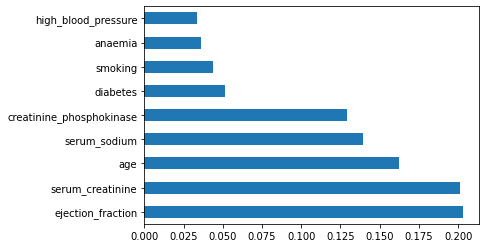

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [ ]:
#Use if you want to select relevant items
sel_X = dataset[['age','creatinine_phosphokinase','ejection_fraction']]
sel_X

,age,creatinine_phosphokinase,ejection_fraction
0,75,582,20
1,55,7861,38
2,65,146,20
3,50,111,20
4,65,160,20
...,...,...,...
294,62,61,38
295,55,1820,38
296,45,2060,60
297,45,2413,38


# SVM

In [ ]:
#using selected features
sel_X = dataset[['age','creatinine_phosphokinase','serum_creatinine','ejection_fraction']]
sel_X

,age,creatinine_phosphokinase,serum_creatinine,ejection_fraction
0,75,582,1.9,20
1,55,7861,1.1,38
2,65,146,1.3,20
3,50,111,1.9,20
4,65,160,2.7,20
...,...,...,...,...
294,62,61,1.1,38
295,55,1820,1.2,38
296,45,2060,0.8,60
297,45,2413,1.4,38


In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(sel_X, Y,test_size =0.33, random_state=1)

Model building

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state = 1)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Y_pred.shape

(99,)

In [ ]:
y_test

173    0
287    0
51     1
146    0
214    0
      ..
163    1
292    0
117    0
258    0
41     1
Name: DEATH_EVENT, Length: 99, dtype: int64

In [ ]:
new_df = pd.DataFrame(data={'predictions': Y_pred, 'actual': y_test})
new_df

,predictions,actual
173,0,0
287,0,0
51,0,1
146,0,0
214,0,0
...,...,...
163,0,1
292,0,0
117,0,0
258,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy * 100,"%")


Accuracy Of SVM For The Given Dataset :  70.70707070707071 %
